In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
#Gradienten 
def f(x):
    return (x[0]+1)**2 + (x[1]+1)**2

def gradf(x):
    return 2*(x[0]+1) + 2*(x[1]+1)

def pi(x):
    return 0.5 * (x[0]**2+x[1]**2-1)**2

def gradpi(x):
    return (x[0]**2+x[1]**2-1) * 2*x

def P(x,alpha):
    return f(x) + alpha*pi(x)

def gradP(x,alpha):
    return gradf(x) + alpha*gradpi(x)

In [3]:
#Penalty-Verfahren
x = np.array([1.,0.])
pts = [x]
for k in range(4):
    alpha   = 2.**k
    p     = lambda x : P(x,alpha)
    gradp = lambda x : gradP(x,alpha)
    out   = minimize(p,x,jac=gradp,method="BFGS",tol=1e-5/alpha)
    print("x"+str(k+1)+" =", out['x'], " BFGS Iterationen =", out['nit'])
    x = out['x']
    pts.append(x)

x1 = [-0.83512336 -0.83512307]  BFGS Iterationen = 11
x2 = [-0.79043662 -0.79043636]  BFGS Iterationen = 1
x3 = [-0.75921094 -0.7592107 ]  BFGS Iterationen = 1
x4 = [-0.72517816 -0.72517801]  BFGS Iterationen = 2


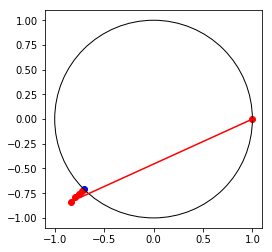

In [4]:
#Plot von Iterationen
plt.scatter([-1/np.sqrt(2)],[-1/np.sqrt(2)],color="b")
X = [p[0] for p in pts]
Y = [p[1] for p in pts]
plt.scatter(X,Y,color='r')
plt.plot(X,Y,color='r')
circle = plt.Circle((0, 0), radius=1, fc='y',fill=False)
plt.gca().add_patch(circle)
plt.axis('scaled')
#plt.axis([-1,-0.6,-1,-0.6])
plt.show()